# Regresión Logística

La regresión logística es un algoritmo de clasificación que es utilizado para predecir la probabilidad de que un dato pertenezca a una categoría. En este método, la variable dependiente es una variable binaria. Nos resolvera problemas de SI o NO. Es un perro? Es rojo?

## Preparando los datos

Dataset de un banco para detectar clientes potenciales para ofrecer un producto financiero de inversión:
https://archive.ics.uci.edu/ml/datasets/bank+marketing

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/bank/bank.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


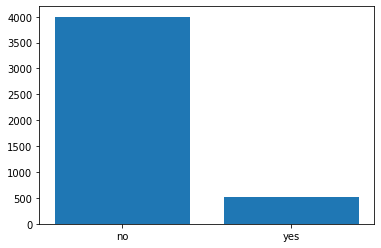

In [2]:
#En problemas de clasificacion es importante saber el balance de la variable de respuesta ( la 'y' )
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(df.y.unique(), df.y.value_counts());

#en este caso tenemos muy pocos 'sies' y pocos 'noes' por lo que necesitamos resampling

## Resampling

Undersampling vs Oversampling

- El submuestreo consiste en eliminar registros aleatorios de la clase mayoritaria, lo que puede causar pérdida de información.
- El sobremuestreo (super) es duplicar registros aleatorios de la clase minoritaria, lo que puede causar un sobreajuste. 

<center><img src="img/sampling.png" width = "70%"></center>

In [3]:
df_no = df[df['y'] == 'no']
df_yes = df[df['y'] == 'yes']

In [4]:
print("no_shape", df_no.shape)
print("yes_shape", df_yes.shape)

no_shape (4000, 17)
yes_shape (521, 17)


In [5]:
# si tenemos 521 'sies' vamos a obterner una muestra de 521 'noes'
df_no_reduced = df_no.sample(521,random_state=103)
df_no_reduced.shape

(521, 17)

In [6]:
df_reduced = pd.concat([df_no_reduced,df_yes],axis=0)
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3163,31,technician,single,secondary,no,373,no,no,cellular,22,aug,346,5,-1,0,unknown,no
1788,40,services,married,secondary,no,113,yes,no,unknown,4,jun,126,1,-1,0,unknown,no
772,26,management,single,tertiary,no,350,no,no,cellular,8,jul,367,1,-1,0,unknown,no
923,32,blue-collar,married,secondary,no,-63,yes,no,unknown,30,may,198,1,-1,0,unknown,no
205,45,technician,single,tertiary,no,0,yes,no,cellular,18,nov,139,2,-1,0,unknown,no


In [7]:
df_reduced.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4494,26,technician,single,secondary,no,668,yes,no,unknown,28,may,576,3,-1,0,unknown,yes
4503,60,self-employed,married,primary,no,362,no,yes,cellular,29,jul,816,6,-1,0,unknown,yes
4504,42,blue-collar,single,secondary,no,1080,yes,yes,cellular,13,may,951,3,370,4,failure,yes
4505,32,admin.,single,secondary,no,620,yes,no,unknown,26,may,1234,3,-1,0,unknown,yes
4511,46,blue-collar,married,secondary,no,668,yes,no,unknown,15,may,1263,2,-1,0,unknown,yes


In [8]:
#como aora tenemos arriba los 'noes' y abajo los 'sies' los vamos a mezclar con sample
df_reduced = df_reduced.sample(frac=1,random_state=103)
df_reduced.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3437,26,services,single,secondary,no,209,yes,no,cellular,22,jul,319,2,-1,0,unknown,no
4125,30,technician,married,secondary,no,-393,yes,yes,cellular,16,jul,435,1,-1,0,unknown,yes
4416,32,blue-collar,single,secondary,no,811,yes,no,cellular,14,may,563,1,-1,0,unknown,yes
1532,33,technician,married,secondary,no,133,no,no,cellular,4,may,218,1,-1,0,unknown,yes
1017,49,blue-collar,married,secondary,no,-454,yes,no,cellular,14,may,558,1,-1,0,unknown,yes


In [9]:
df_reduced.shape

(1042, 17)

In [10]:
#Usaremos la variable duration que la normalizaremos
X = df_reduced['duration'].values.reshape(-1, 1)
y = df_reduced['y']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=103)

In [11]:
print(X_train.shape)
print(X_test.shape)

(698, 1)
(344, 1)


In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_train_hat = clf.predict(X_train)
y_test_hat = clf.predict(X_test)
clf.score(X_train,y_train)

0.7292263610315186

In [13]:
clf.score(X_test,y_test)

0.7209302325581395

In [14]:
pro = clf.predict_proba(X_train)[:,0]

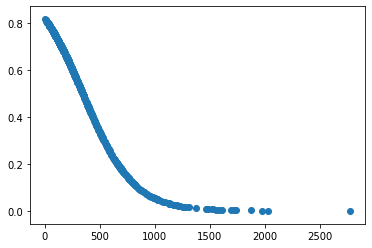

In [15]:
plt.scatter(X_train,pro)
#tenemos los datos pero para evaluar fácilmente los resultados necesitamos una matriz de confusion que nos diga facilmente SI o NO

https://es.wikipedia.org/wiki/Funci%C3%B3n_log%C3%ADstica

# Matriz de confusión

Una matriz de confusion es una herramienta que nos permite visualizar y comprender de una manera rapida el comportamiento de un modelo de clasificacion. La principal ventaja de utilizar una matriz de confusion es que ademas de mostrarnos los errores nos muestr el tipo de errores.

<center><img src="img/conf.png" width = "30%"></center>

- TP: verdadero positivo
- TN: verdadero negativo
- FP: falso positivo(error de tipo 1)
- FN: false negativo(error de tipo 2)

In [16]:
from sklearn.metrics import confusion_matrix
labels = ['yes','no']
confusion_matrix(y_train,y_train_hat,labels = labels)

array([[224, 129],
       [ 60, 285]], dtype=int64)

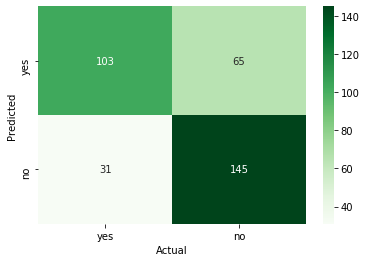

In [17]:
import seaborn as sns

cm = confusion_matrix(y_test,y_test_hat,labels)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual');

In [18]:
TP,FP,FN,TN=cm.flatten()
print(TP,FP,FN,TN)

103 65 31 145


### Recall o true positive rate (TPR)

Porcentaje de casos positivos correctamente clasificados
$$TPR=\frac{TP}{TP+FN}$$

In [19]:
TPR = TP/(TP+FN)
TPR

0.7686567164179104

### Precision (PPV)

Porcentaje de realmente correctos a partir de los casos clasificados como correctos
$$PPV=\frac{TP}{TP+FP}$$

In [20]:
PPV = TP/(TP+FP)
PPV

0.6130952380952381

- TPR alto con un PPV bajo indica que la mayoría de los casos positivos son clasificados correctamente, pero hay muchos falsos positivos.
- TPR bajo con PPV alto indica que la predicción fallo muchos casos positivos, pero los que clasificamos como positivos muy probablemente sean positivos.

### Accuracy (ACC)

Porcentaje de predicciones correctas
$$ACC=\frac{TP+TN}{TP+TN+FP+FN}$$

In [21]:
(TP+TN)/cm.sum()

0.7209302325581395

### F-measure
Media armonica de TPR y PPV.

$$Fmeasure=\frac{2 \times TPR \times PPV}{TPR+PPV}$$

In [22]:
F = (2*TPR*PPV)/(TPR+PPV) #media armonica entre TPR y PPV
F

0.6821192052980133

In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test,y_test_hat))
print(classification_report(y_test,y_test_hat))

0.7209302325581395
              precision    recall  f1-score   support

          no       0.69      0.82      0.75       176
         yes       0.77      0.61      0.68       168

   micro avg       0.72      0.72      0.72       344
   macro avg       0.73      0.72      0.72       344
weighted avg       0.73      0.72      0.72       344

